<a href="https://colab.research.google.com/github/jcterrero02/CoderHouse/blob/main/Fundamentos%20para%20la%20Ciencia%20de%20Datos/Credit_Card_Elegibility_Julio_Terrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Url del dataset hosteado en Github, con informacion sobre aprobaciones de tarjetas de credito
url = 'https://raw.githubusercontent.com/jcterrero02/CoderHouse/main/Fundamentos%20para%20la%20Ciencia%20de%20Datos/data/credit_card_elegibilty.csv'

dataset = pd.read_csv(url, delimiter=',')

Variable	Description
*  **ID**	An identifier for each individual (customer).
* **Gender**	The gender of the individual.
* **Own_car**	A binary feature indicating whether the individual owns a car.
* **Own_property**	A binary feature indicating whether the individual owns a property.
* **Work_phone**	A binary feature indicating whether the individual has a work phone.
* **Phone**	A binary feature indicating whether the individual has a phone.
* **Email**	A binary feature indicating whether the individual has provided an email address.
* **Unemployed**	A binary feature indicating whether the individual is unemployed.
* **Num_children**	The number of children the individual has.
* **Num_family**	The total number of family members.
* **Account_length**	The length of the individual's account with a bank or financial institution.
* **Total_income**	The total income of the individual.
* **Age**	The age of the individual.
* **Years_employed**	The number of years the individual has been employed.
* **Income_type**	The type of income (e.g., employed, self-employed, etc.).
* **Education_type**	The education level of the individual.
* **Family_status**	The family status of the individual.
* **Housing_type**	The type of housing the individual lives in.
* **Occupation_type**	The type of occupation the individual is engaged in.
* **Target**	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

**Preguntas a responder sobre el dataset**
1. Existe una relación entre la edad y la aprobación de una tarjeta de crédito?
2. Los aplicantes con ingresos más altos tienen probabilidad más alta de aprobación de una tarjeta de crédito?
3. La cantidad de dependientes afecta la probabilidad de aprobación de una tarjeta de crédito?
4. Existe una diferencia significativa entre la elegibilidad de la tarjeta dependiendo el género del solicitante?
5. El tipo de trabajo influye en la elegibilidad?

In [14]:
# Visualizacion de las primeras 5 filas del dataset
dataset.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [16]:
dataset.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

No existen valores nulos dentro del dataset

In [17]:
# Descripcion de Variable Objetivo/Dependiente
dataset['Target'].describe()

count    9709.000000
mean        0.132145
std         0.338666
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Target, dtype: float64

In [18]:
dataset['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

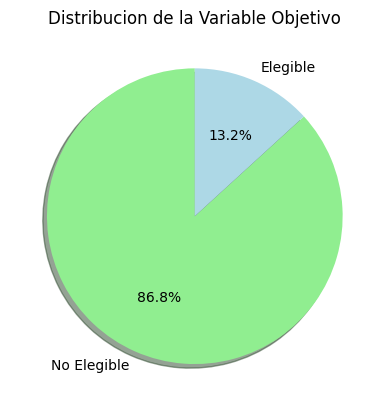

In [19]:
# Conteo de la variable objetivo
target_counts = dataset['Target'].value_counts()

labels = ['No Elegible', 'Elegible']
colors = ['lightgreen', 'lightblue']

plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Distribucion de la Variable Objetivo')
plt.show()


Se evidencia que tenemos un dataset desbalanceado

<Axes: xlabel='Target', ylabel='Total_income'>

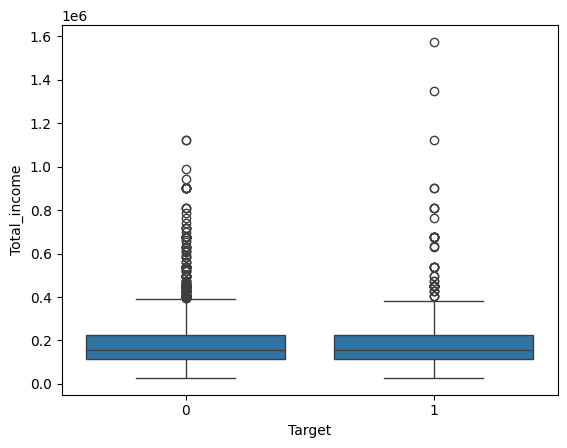

In [20]:
# Veamos la distribucion de los ingresos comparado con la variable objetivo
sns.boxplot(data=dataset, y= 'Total_income', x="Target")


In [21]:
income_pivot = dataset.pivot_table(values='Total_income', index='Target', aggfunc='mean')
print(income_pivot)

         Total_income
Target               
0       180500.539817
1       186007.008963


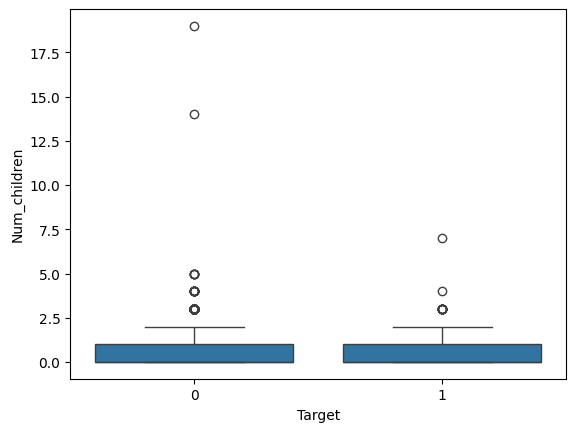

In [22]:
# Verifiquemos si la cantidad de hijos afecta la elegibilidad de la tarjeta de crédito

sns.boxplot(data=dataset, y= 'Num_children', x="Target")
plt.show()

Aparte de algunos valores atipicos no aparenta ver relación negativa entre la cantidad de hijos y la aprobación de la tarjeta de crédito

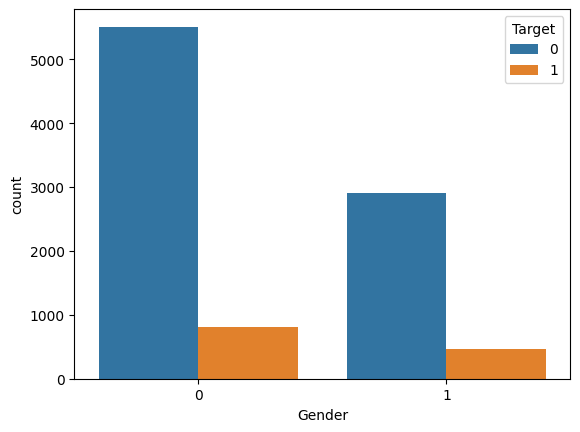

In [23]:
# Verifiquemos si el sexo afecta la variable objetivo
sns.countplot(x = 'Gender', hue = 'Target', data = dataset)
plt.show()


La diferencia entre las personas que reciben una tarjeta y las que no, a nivel de ingresos totales no aparenta ser tan significativa

<Axes: xlabel='Target', ylabel='Age'>

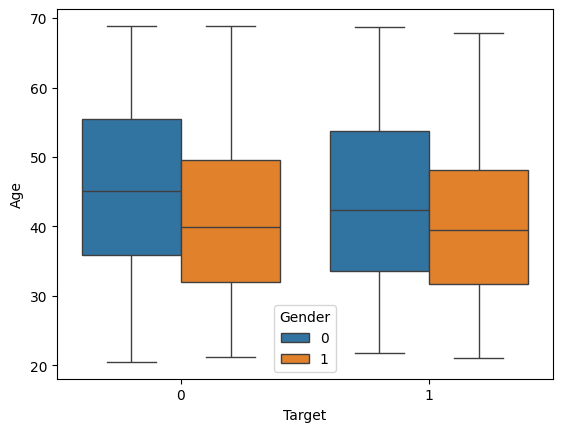

In [24]:
sns.boxplot(x = "Target", y = "Age", hue='Gender', data = dataset)

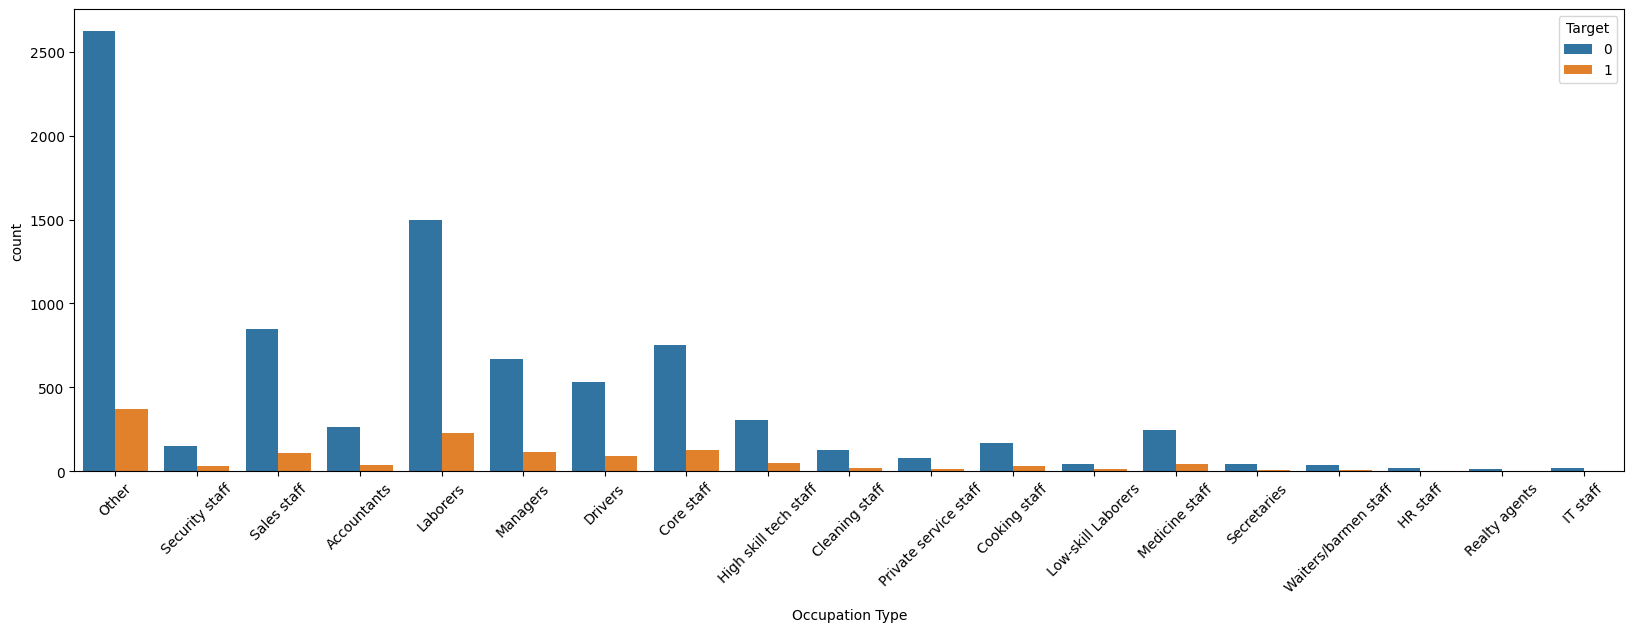

In [25]:
# Analizar si el tipo de ocupación afecta la variable objetivo
plt.figure(figsize=(20, 6))

sns.countplot(x = "Occupation_type", hue = "Target", data = dataset)
plt.xlabel("Occupation Type", labelpad=10.0)
plt.xticks(rotation=45)
plt.show()

La ocupación "Laborers" aparenta tener alta incidencia en la no aprobación del crédito